In [14]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

SEQ_LEN=120
OUTPUT_LEN=20
# DO_PLOT=False
DO_PLOT=True

In [15]:
model=load_model("./models/PRED-1594487638-OUTPUT_LEN=20_model.h5")

# print(model)
url = "./datasets/DAT_ASCII_EURUSD_M1_2018.csv"
df = pd.read_csv(url, names=list(["date","open", "high", "low", "close", "volume"]), header=None, sep=";")
df.drop("volume", 1, inplace=True)
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.set_index('date', inplace=True)

df.head()

open     high      low    close
date                                                   
2018-01-01 17:00:00  1.20037  1.20100  1.20037  1.20100
2018-01-01 17:01:00  1.20083  1.20095  1.20017  1.20030
2018-01-01 17:02:00  1.20035  1.20043  1.20035  1.20043
2018-01-01 17:03:00  1.20041  1.20050  1.20031  1.20046
2018-01-01 17:04:00  1.20049  1.20049  1.20046  1.20048

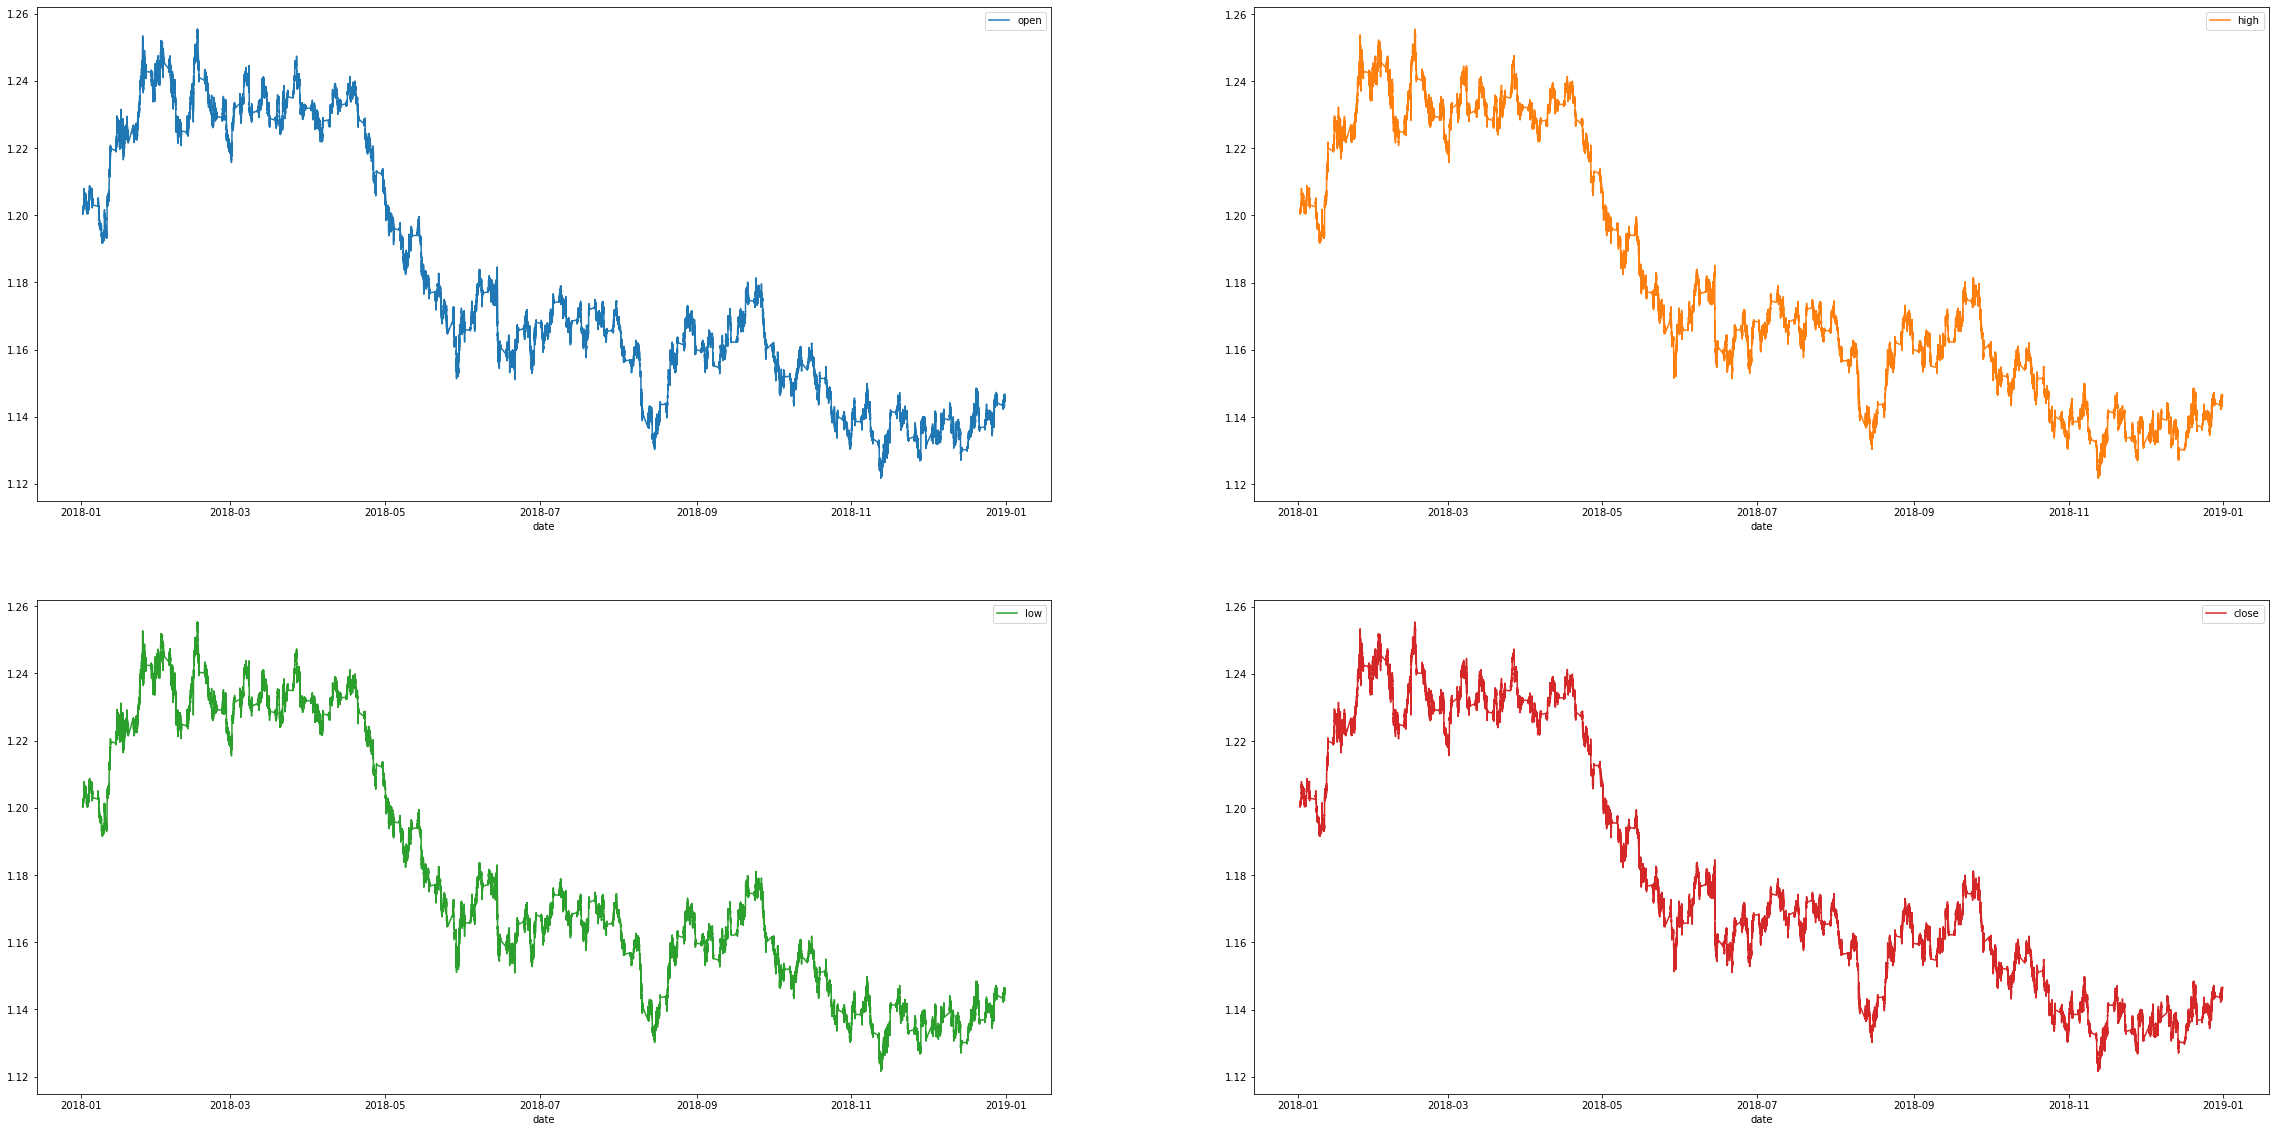

In [16]:
 if DO_PLOT:
     df.plot(subplots=True, layout=(2, 2), figsize=(40, 20), sharex=False)

In [17]:
data_set = df.iloc[:, 3].values #close
print(data_set)

[1.201   1.2003  1.20043 ... 1.14645 1.14672 1.14644]


In [18]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set.reshape(-1,1))

In [19]:
print(data_set_scaled.reshape(1, -1)[0])

[0.59328749 0.58805502 0.58902676 ... 0.18552848 0.18754672 0.18545373]


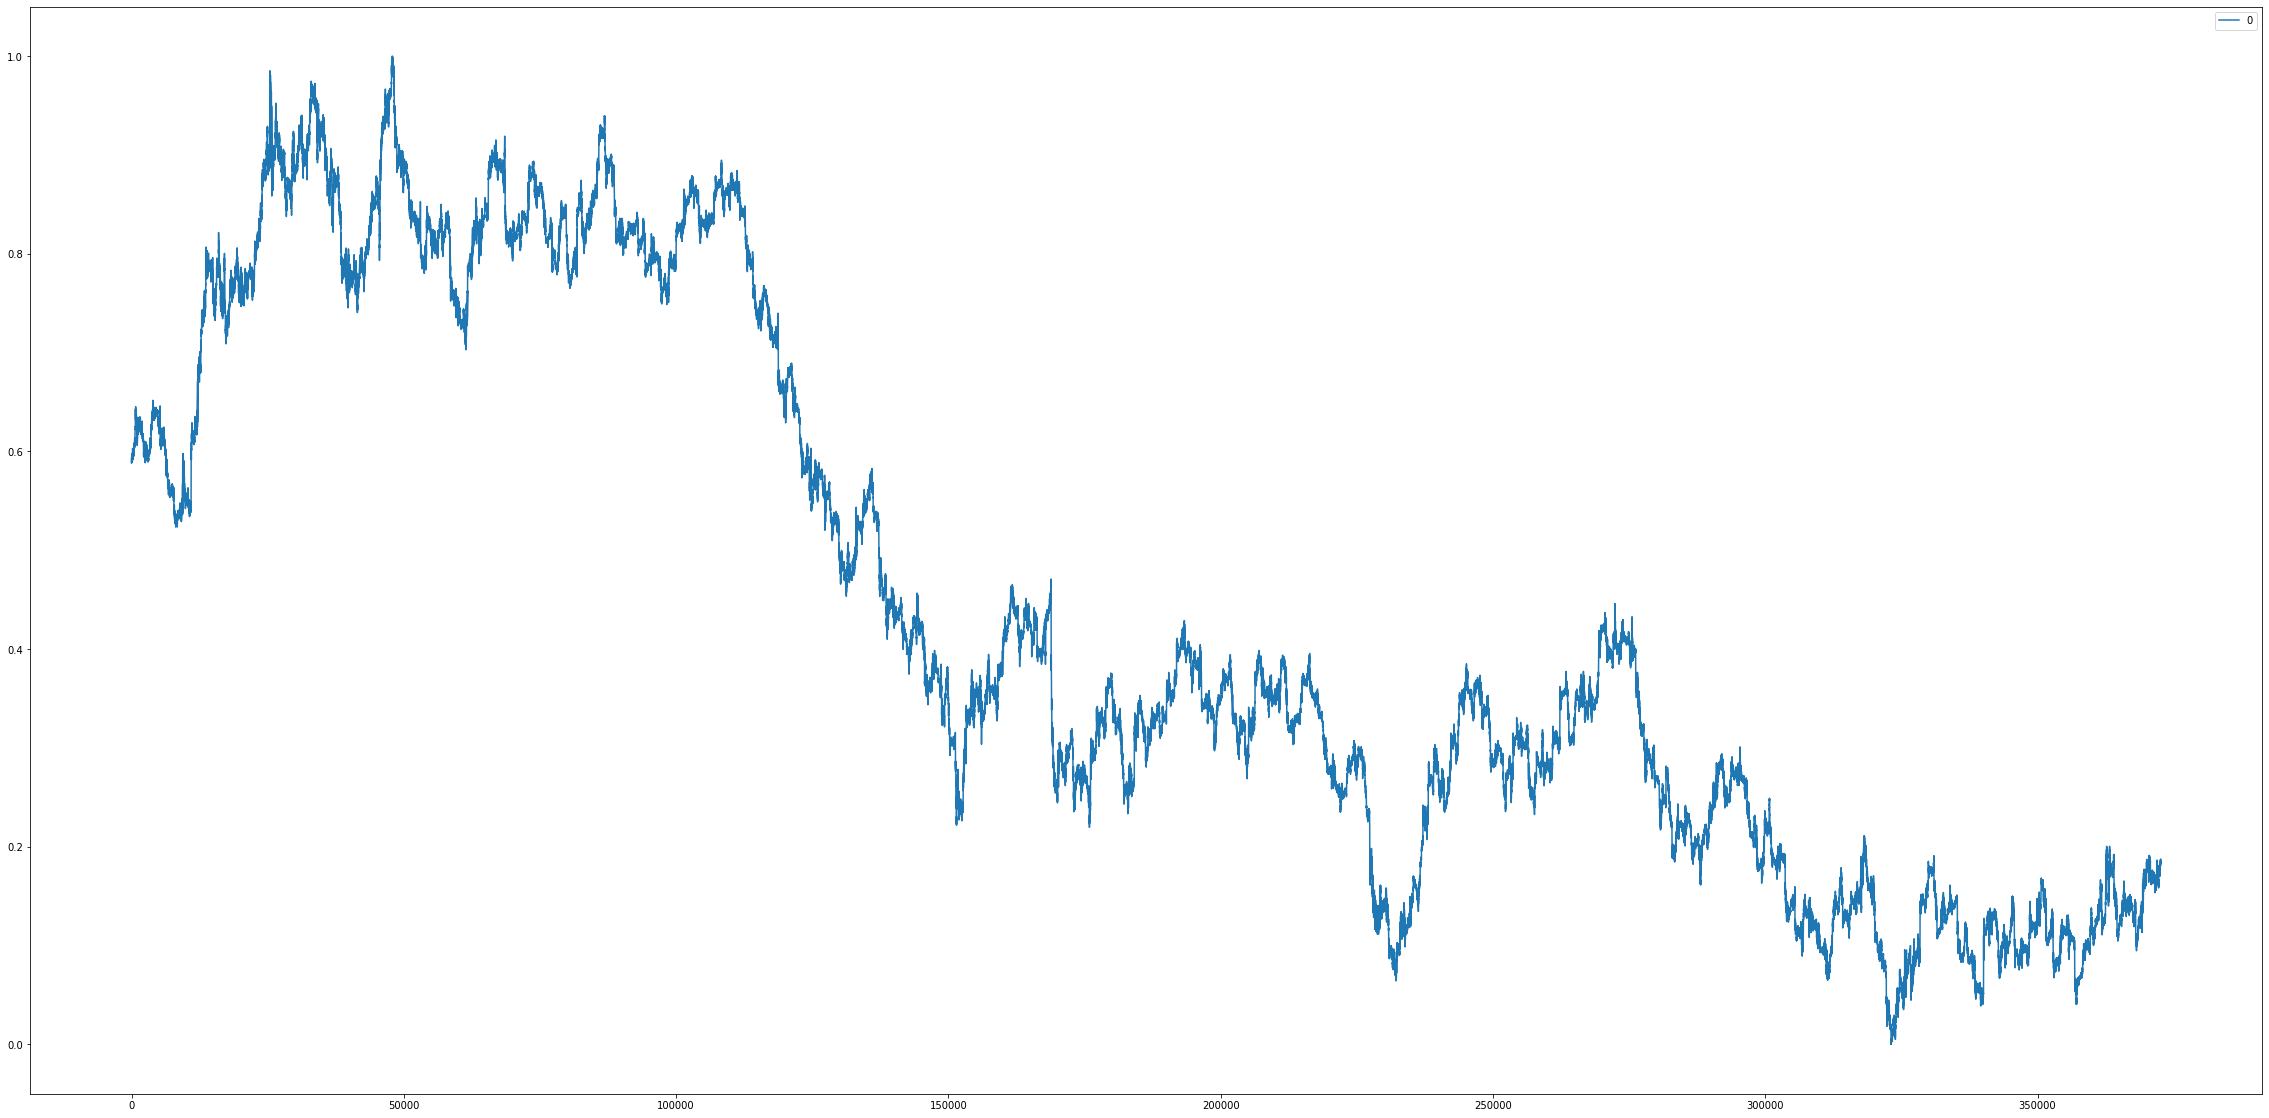

In [20]:
if DO_PLOT:
    pd.DataFrame(data=data_set_scaled.reshape(1, -1)[0]).plot(figsize=(40, 20), )

In [21]:
print(len(data_set_scaled.reshape(1, -1)[0]))
print(np.array([data_set_scaled[:SEQ_LEN]]).shape)
first_val=data_set_scaled.reshape(1, -1)[0][:SEQ_LEN]

372607
(1, 120, 1)


In [22]:
print(len(first_val))

120


In [23]:
chain_predict = np.array([data_set_scaled[:SEQ_LEN]])
# flat_chain_pred=np.array([x[0] for x in chain_predict[0][:50]])
# concatenated=np.concatenate((np.array([x[0] for x in chain_predict[0][:50]]), pred_test[0]))

# print(np.array([concatenated.reshape(-1,1)]).shape)

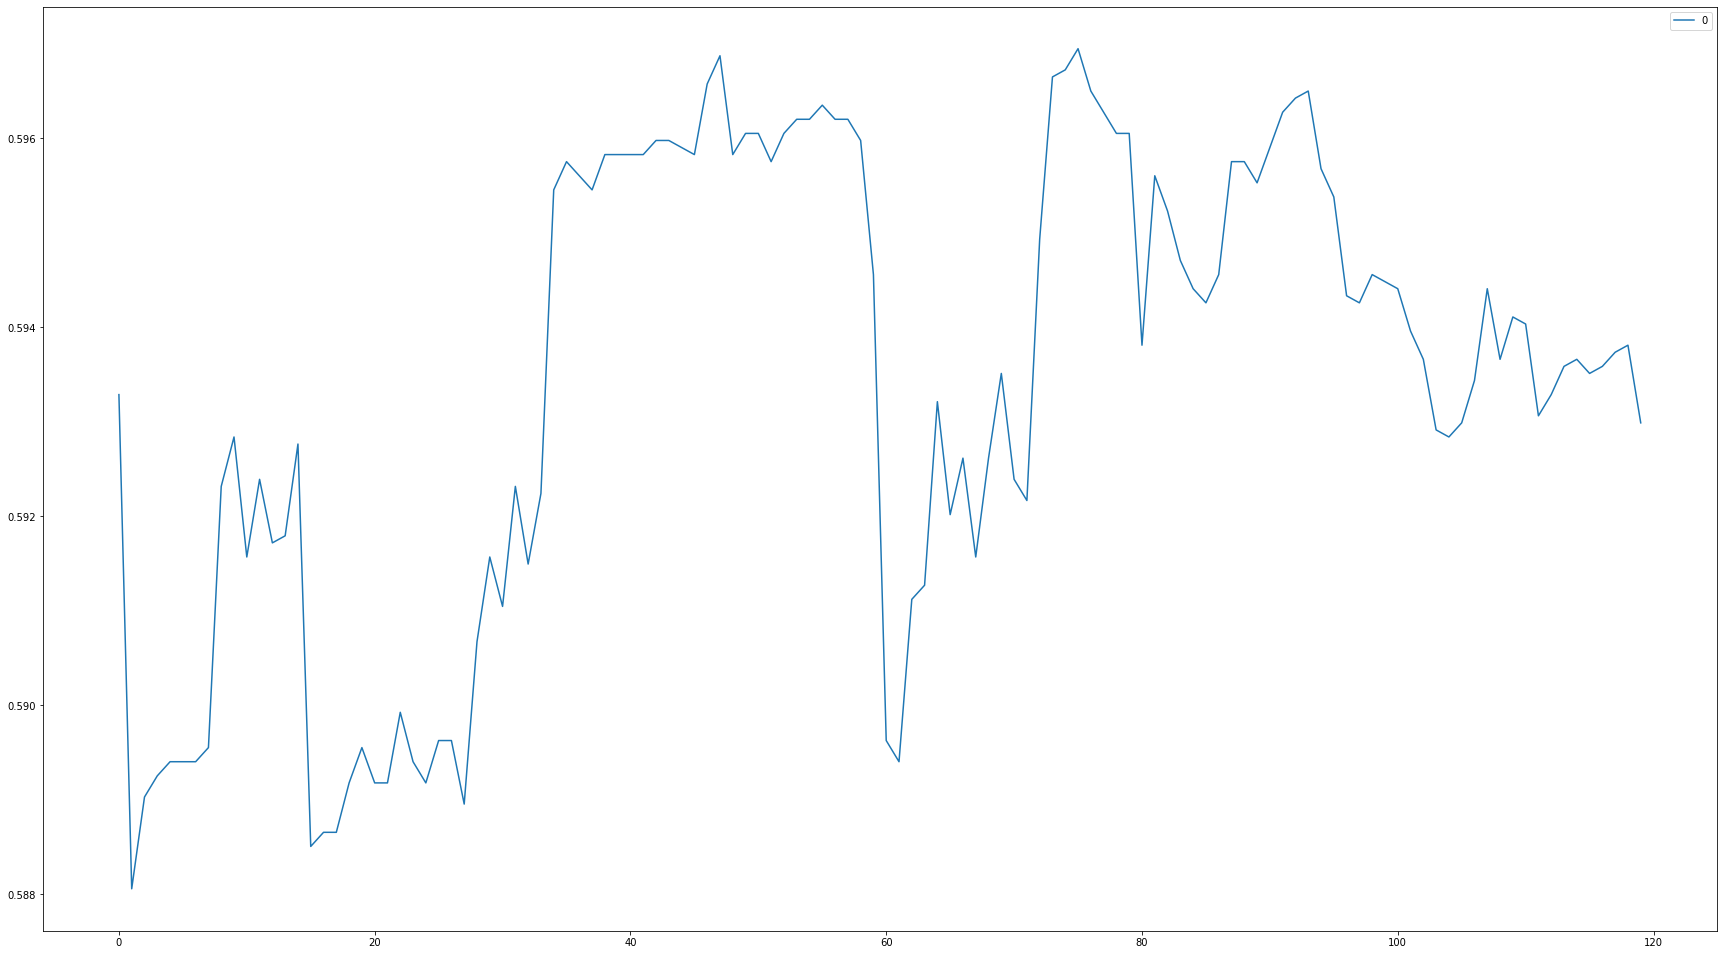

In [24]:
pd.DataFrame(data=chain_predict[0]).plot(figsize=(30, 17), )

In [25]:
output=[]

for i in range(SEQ_LEN,5000):
    if i%1000==0 or i==0:
        print(chain_predict.shape)
    pred_val=model.predict(chain_predict)
    output.append(pred_val)
    concatenated=np.concatenate((np.array([x[0] for x in chain_predict[0][:SEQ_LEN-OUTPUT_LEN]]), pred_val[0]))
    chain_predict=np.array([concatenated.reshape(-1,1)])

(1, 120, 1)
(1, 120, 1)
(1, 120, 1)
(1, 120, 1)


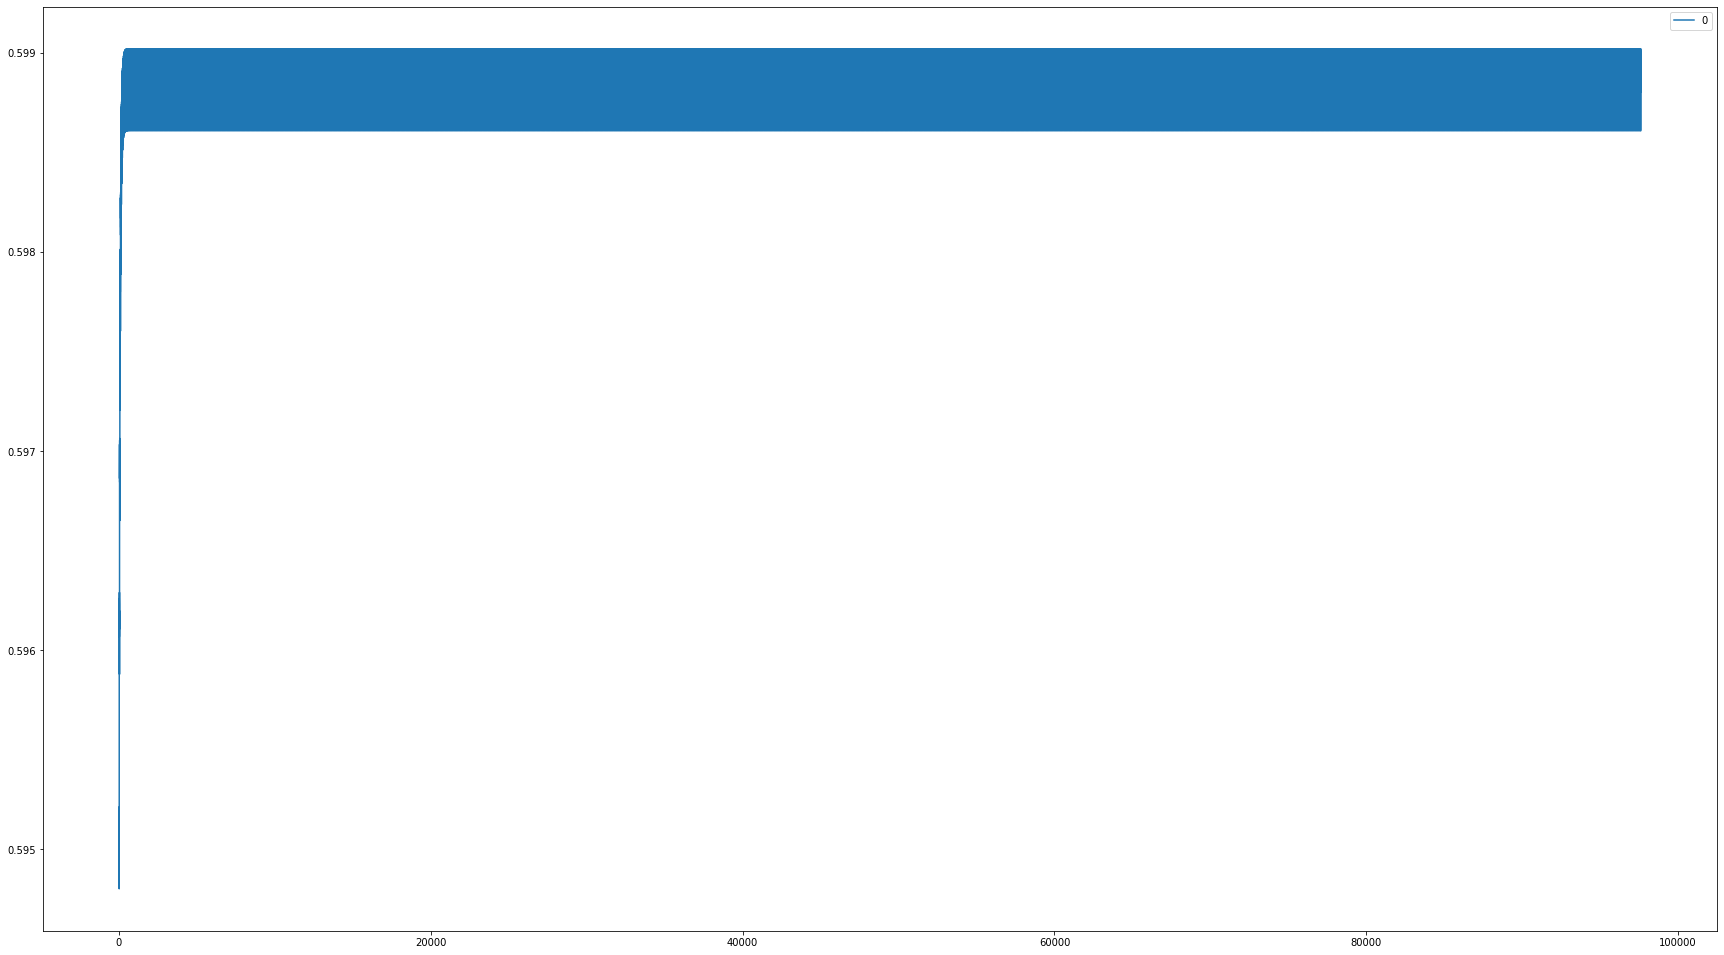

In [26]:
npoutput=sc.inverse_transform(np.array(output).reshape(-1,1))
npoutput=np.array(output).reshape(1,-1)[0]


pd.DataFrame(data=npoutput).plot(figsize=(30, 17))